# Exploratory Data Analysis (EDA)

## Dataset Information

Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age.  Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

**Source:** https://archive.ics.uci.edu/dataset/1/abalone

#### Additional Information

Abalone are a type of sea snail, a gastropod mollusc, that grows in coastal seawater. Members of the Haliotidae family, they range in size from 4 to 10 inches (10 to 25 cm). These marine creatures have a single shell on top with a large foot underneath, which is used for moving and eating. The shell is flat and spiral-shaped, with several small holes around its perimeter, and it is lined with mother of pearl, which is sought after for button, trinket and jewellery making.

**Source:** https://asc-aqua.org/learn-about-seafood-farming/farmed-abalone/

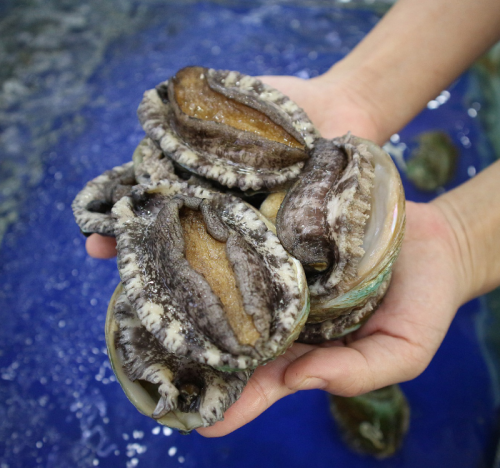

**Source:** https://api.minapoli.com/media/infomina/p/medium_f4bb3b54003788adcfd8cd616fcd9b01.png

## Data Preparation

#### Importing Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import anderson
from scipy.stats import f_oneway
from statsmodels.stats.diagnostic import normal_ad

In [ ]:
!pip install polars

import polars as pl

print(pl.__version__)

0.20.2


#### Loading Data

In [ ]:
abalone_data = "https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/abalone.csv"

In [ ]:
df = pd.read_csv(abalone_data)

## Data Exploration

### Data Description



*   `Sex` - nominal - M, F, and I (infant)
*   `Length` - continuous - mm - Longest shell measurement
*   `Diameter` - continuous - mm - perpendicular to length
*   `Height` - continuous - mm - with meat in shell
*   `Whole weight` - continuous - grams - whole abalone
*   `Shucked weight` - continuous - grams - weight of meat
*   `Viscera weight` - continuous - grams - gut weight (after bleeding)
*   `Shell weight` - continuous - grams - after being dried
*   `Rings` - integer - +1.5 gives the age in years (target)

[Pandas cheatsheet](https://images.datacamp.com/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf)

In [ ]:
df.head()  # returns the first 5 rows (default)

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125           NaN          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [ ]:
df.tail()  # returns last 5 rows (default)

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12

In [ ]:
df.sample(5)  # returns a random sample of items from an axis of object

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
2996   F   0.620      0.50   0.170        1.1480          0.5475   
593    F   0.660      0.52   0.180        1.5140          0.5260   
429    F   0.575      0.45   0.170        1.0475          0.3775   
1952   I   0.640      0.49   0.135        1.1000          0.4880   
2699   M   0.670      0.50   0.200        1.2690          0.5760   

      Viscera weight  Shell weight  Rings  
2996          0.2200        0.3315     10  
593           0.2975        0.4200     19  
429           0.1705        0.3850     18  
1952          0.2505        0.2925     10  
2699          0.2985        0.3510     11

### Dataset Characteristics

**DataFrame dimensionality (n rows, n columns)**

In [ ]:
df.shape

(4177, 9)

**Information about the DataFrame (index dtype and columns, non-null values and memory usage)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


**Comments:**

Missing values found in the **Diameter**, **Whole weight** and **Shell weight** columns (4177 $-$ 4078 $=$ 99 rows).

### Descriptive Statistics

In [ ]:
df.describe(include='all')

Sex       Length     Diameter       Height  Whole weight  \
count   4177  4177.000000  4078.000000  4177.000000   4078.000000   
unique     4          NaN          NaN          NaN           NaN   
top        M          NaN          NaN          NaN           NaN   
freq    1447          NaN          NaN          NaN           NaN   
mean     NaN     0.523992     0.407840     0.139516      0.827306   
std      NaN     0.120093     0.099286     0.041827      0.490348   
min      NaN     0.075000     0.055000     0.000000      0.002000   
25%      NaN     0.450000     0.350000     0.115000      0.440500   
50%      NaN     0.545000     0.425000     0.140000      0.798500   
75%      NaN     0.615000     0.480000     0.165000      1.150875   
max      NaN     0.815000     0.650000     1.130000      2.825500   

        Shucked weight  Viscera weight  Shell weight        Rings  
count      4177.000000     4177.000000   4127.000000  4177.000000  
unique             NaN             NaN           NaN          NaN  
top                NaN             NaN           NaN          NaN  
freq               NaN             NaN           NaN          NaN  
mean          0.359367        0.180594      0.239072     9.933684  
std           0.221963        0.109614      0.138942     3.224169  
min           0.001000        0.000500      0.001500     1.000000  
25%           0.186000        0.093500      0.130000     8.000000  
50%           0.336000        0.171000      0.235000     9.000000  
75%           0.502000        0.253000      0.328250    11.000000  
max           1.488000        0.760000      1.005000    29.000000

**Numerical data characteristics**

In [ ]:
df.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4078.000000  4177.000000   4078.000000     4177.000000   
mean      0.523992     0.407840     0.139516      0.827306        0.359367   
std       0.120093     0.099286     0.041827      0.490348        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.440500        0.186000   
50%       0.545000     0.425000     0.140000      0.798500        0.336000   
75%       0.615000     0.480000     0.165000      1.150875        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4127.000000  4177.000000  
mean         0.180594      0.239072     9.933684  
std          0.109614      0.138942     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.235000     9.000000  
75%          0.253000      0.328250    11.000000  
max          0.760000      1.005000    29.000000

In [ ]:
np.percentile(df.Length, 80)  # 80% percentile

0.625

**Categorical data characteristics**

In [ ]:
df.describe(include='object')

Sex
count   4177
unique     4
top        M
freq    1447

## Data Preprocessing

### Misspelled values

In [ ]:
# Return a Series containing the frequency of each distinct row in the Dataframe
df.Sex.value_counts()

M    1447
I    1276
F    1259
f     195
Name: Sex, dtype: int64

**Comments:**

From the data description, we know that the '**Sex**' column has three categories - **M, F,** and **I** (infant). During the data exploration (above), two variants of the female gender designation were found - **F** (1259 values) and **f** (195 values), respectively. Let's replace **f** with **F** to combine data related to the same gender.

In [ ]:
df['Sex'] = df['Sex'].replace('f', 'F')
df.Sex.value_counts()

F    1454
M    1447
I    1276
Name: Sex, dtype: int64

### Duplicates

In [ ]:
df.duplicated().sum()

0

**Comments:**

No duplicate rows found.

### Missing values

**Reference:** https://colab.research.google.com/drive/12E5JkkgkbHZoT1-a3Ok9bYHJ1vkzzaGi

In [ ]:
df.isnull().mean() * 100

Sex               0.000000
Length            0.000000
Diameter          2.370122
Height            0.000000
Whole weight      2.370122
Shucked weight    0.000000
Viscera weight    0.000000
Shell weight      1.197031
Rings             0.000000
dtype: float64

**Comments:**

The missing values in the **Diameter, Whole weight** and **Shell weight** columns are **1-2%**, so next we will fill them with the median values, because median is resistant to outliers:

In [ ]:
diameter_median = df["Diameter"].median()
df["Diameter"].fillna(diameter_median, inplace=True)
diameter_median

0.425

In [ ]:
whole_wt_median = df["Whole weight"].median()
df["Whole weight"].fillna(whole_wt_median, inplace=True)
whole_wt_median

0.7985

In [ ]:
shell_wt_median = df["Shell weight"].median()
df["Shell weight"].fillna(shell_wt_median, inplace=True)
shell_wt_median

0.235

In [ ]:
df.isnull().sum().sum()

0

### Target

*   `Rings` - integer - +1.5 gives the age in years (target)

**Comments:**

From the data description, we know that the target variable, **Age**, which is originally not represented in this dataset, can be obtained by adding 1.5 to each of the values in the **Rings** column.

In this case, we will not need the **Rings** column for further analysis.

In [ ]:
df["Age"] = df["Rings"] + 1.5
df.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.7985          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings   Age  
0         0.150     15  16.5  
1         0.070      7   8.5  
2         0.210      9  10.5  
3         0.155     10  11.5  
4         0.055      7   8.5

In [ ]:
del df["Rings"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


## Univariate/Bivariate analysis

### Numerical Data Distribution

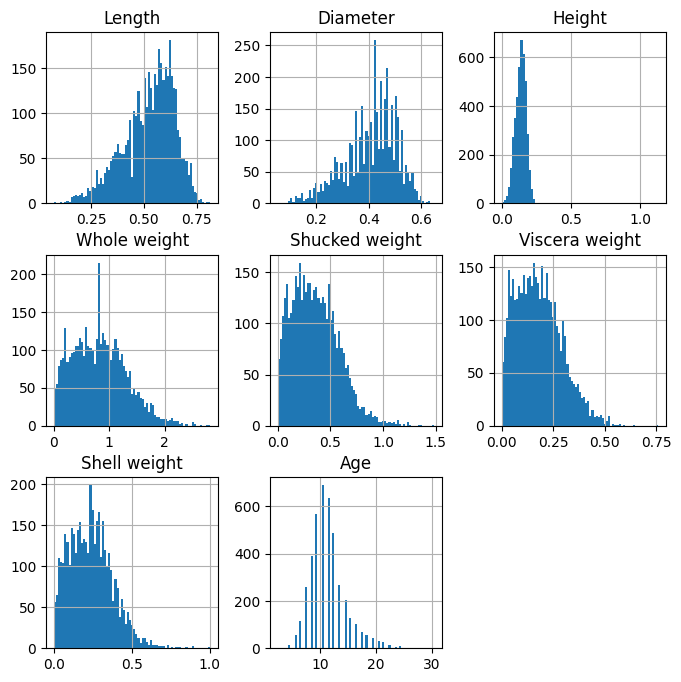

In [ ]:
df.hist(bins=75, figsize=(8,8));

### Length

<Axes: xlabel='Length', ylabel='Count'>

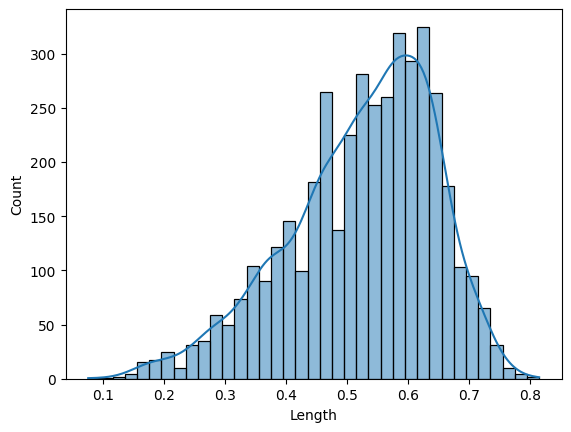

In [ ]:
sns.histplot(data=df['Length'], kde=True)

**Negatively Skewed Distribution**

Mode  $>$  Median  $>$ Mean

**Reference:** https://corporatefinanceinstitute.com/resources/data-science/negatively-skewed-distribution/

In [ ]:
df.Length.describe()

count    4177.000000
mean        0.523992
std         0.120093
min         0.075000
25%         0.450000
50%         0.545000
75%         0.615000
max         0.815000
Name: Length, dtype: float64

In [ ]:
df.Length.mode()

0    0.550
1    0.625
Name: Length, dtype: float64

In [ ]:
# Anderson Darling test statistic and pvalue
normal_ad(df['Length'].values)

(36.6212136651302, 0.0)

**Comments:**

The data in the **Length** column has a negatively skewed distribution (Mode $>$ Median $>$ Mean): (0.550 и 0.625) $>$ 0.545 $>$ 0.524, respectively.

The fact that the distribution differs from normal is also confirmed by the Anderson-Darling test (pvalue = 0.0).

*   `Length` - continuous - mm - Longest shell measurement

**Comments:**

The average length of an abalone shell (**Mean longest shell measurement**) is **0.524 mm**, which is a very small value, it is not comparable with the age of the abalone and public data, **probably the units of the measurements are incorrect** .

**Reference:** https://www.researchgate.net/figure/Declining-red-abalone-shell-size-through-time-showing-mean-shell-size-for-San-Miguel_fig5_259526253

**Length vs Age Relationship**

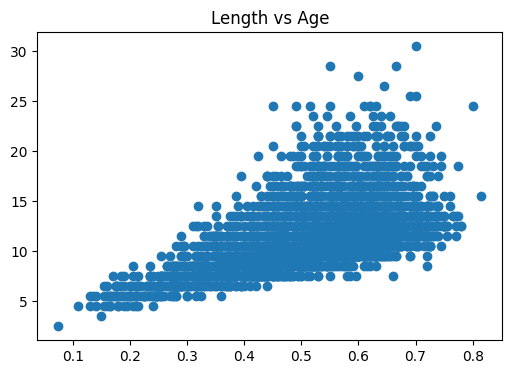

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Length vs Age')
plt.scatter(df.Length, df.Age);

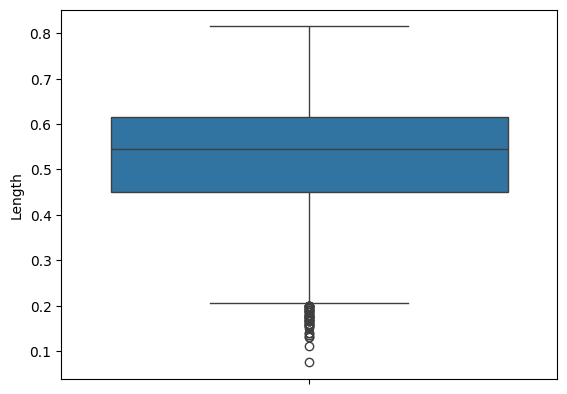

In [ ]:
sns.boxplot(df.Length);

In [ ]:
# Pearson product-moment correlation coefficient
np.corrcoef(df.Length, df.Age)[0][1]

0.5567195769296179

**Chaddock scale for interpretation of correlation analysis results**

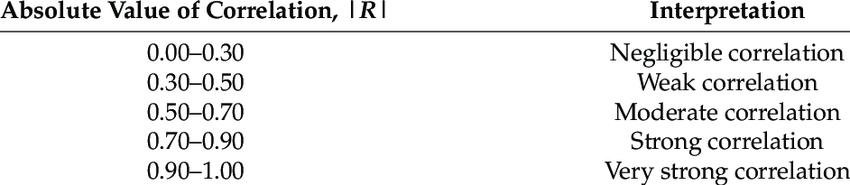

**Source:** https://www.researchgate.net/figure/Chaddock-scale-for-interpretation-of-correlation-analysis-results_tbl2_358611944

**Comments:**

The correlation coefficient of the Pearson product moments for shell length and abalone age is **0.56**, such a relationship on the Chaddock scale is assessed as moderate, which is confirmed by the distribution of data on the scatter plot, i.e. the length of an abalone shell relative to its age can vary a lot.

In the box plot, we can observe outliers below the "whiskers".

### Diameter

<Axes: xlabel='Diameter', ylabel='Count'>

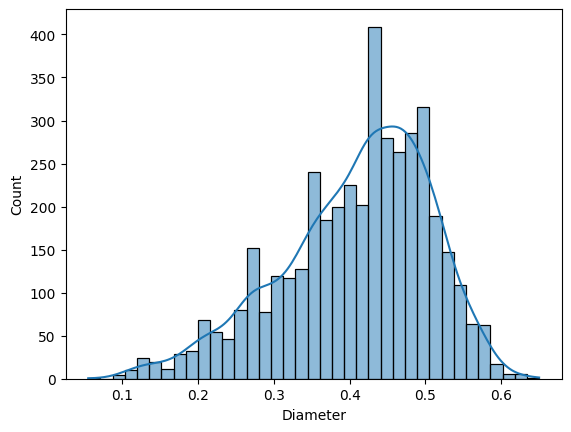

In [ ]:
sns.histplot(data=df['Diameter'], kde=True)

**Negatively Skewed Distribution**

Mode  $>$  Median  $>$ Mean

In [ ]:
df.Diameter.describe()

count    4177.000000
mean        0.408246
std         0.098137
min         0.055000
25%         0.350000
50%         0.425000
75%         0.480000
max         0.650000
Name: Diameter, dtype: float64

In [ ]:
df.Diameter.mode()

0    0.425
Name: Diameter, dtype: float64

In [ ]:
# Anderson Darling test statistic and pvalue
normal_ad(df['Diameter'].values)

(36.18116904645194, 0.0)

**Comments:**

The data in the **Diameter** column has a distribution that is close to negatively skewed (Mode $>$ Median $>$ Mean), because, in this case, the mode and median are equal: 0.425 $\geq$ 0.425 $>$ 0.408.

The fact that the distribution differs from normal is also confirmed by the Anderson-Darling testа (pvalue = 0.0).

**Diameter vs Age Relationship**

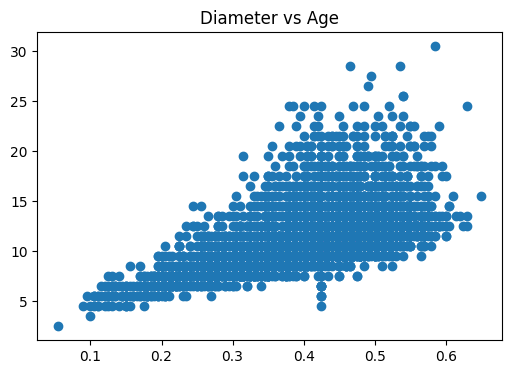

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Diameter vs Age')
plt.scatter(df.Diameter, df.Age);

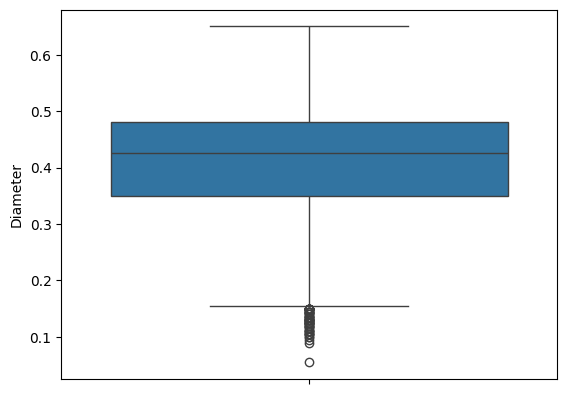

In [ ]:
sns.boxplot(df.Diameter);

In [ ]:
# Pearson product-moment correlation coefficient
np.corrcoef(df.Diameter, df.Age)[0][1]

0.5635124396671253

**Comments:**

The correlation coefficient of the Pearson product moments for diameter and abalone age is **0.56**, such a relationship on the Chaddock scale is assessed as moderate, which is confirmed by the distribution of data on the scatter plot, i.e. the diameter of an abalone relative to its age can vary.

In the box plot, we can observe outliers below the "whiskers".

### Height

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Height', ylabel='Count'>

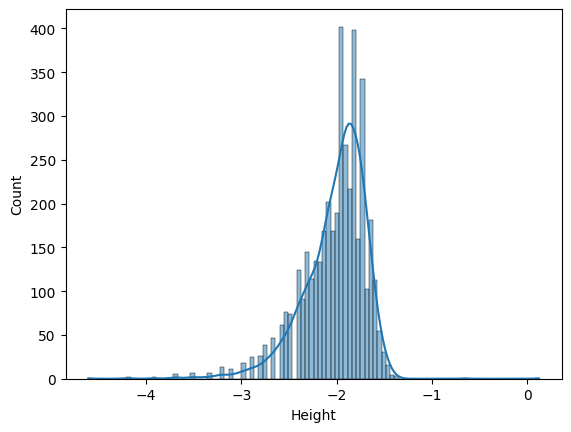

In [ ]:
# sns.set(style='white', rc={"figure.figsize": (8, 4)})
sns.histplot(data=np.log(df['Height']), kde=True)

**Negatively Skewed Distribution**

Mode  $>$  Median  $>$ Mean

In [ ]:
df.Height.describe()

count    4177.000000
mean        0.139516
std         0.041827
min         0.000000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

In [ ]:
df[(df == 0).any(axis=1)]

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
1257   I   0.430      0.34     0.0         0.428          0.2065   
3996   I   0.315      0.23     0.0         0.134          0.0575   

      Viscera weight  Shell weight  Age  
1257          0.0860        0.1150  9.5  
3996          0.0285        0.3505  7.5

**Comments:**

In two cases, the values of **Height** are $=0.0$, with filled values in the **Length** and **Diameter** columns (the values differ significantly from 0), which looks confusing. Let's replace these values with medians:

In [ ]:
height_median = df.Height.median()
height_median

0.14

In [ ]:
df['Height'] = df['Height'].replace(0.0, height_median)

In [ ]:
df.iloc[[1257, 3996]]

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
1257   I   0.430      0.34    0.14         0.428          0.2065   
3996   I   0.315      0.23    0.14         0.134          0.0575   

      Viscera weight  Shell weight  Age  
1257          0.0860        0.1150  9.5  
3996          0.0285        0.3505  7.5

In [ ]:
df[(df == 0).any(axis=1)]

Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight, Age]
Index: []

In [ ]:
df.Height.describe()

count    4177.000000
mean        0.139583
std         0.041715
min         0.010000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

In [ ]:
df.Height.mode()

0    0.15
Name: Height, dtype: float64

In [ ]:
# Anderson Darling test statistic and pvalue
normal_ad(df['Height'].values)

(inf, 0.0)

**Comments:**

The data in the **Height** column has a distribution that is close to negatively skewed (Mode $>$ Median $>$ Mean), because, in this case, the median and mean are equal: 0.15 $>$ 0.14 $\geq$ 0.14, respectively.

The fact that the distribution differs from normal is also confirmed by the Anderson-Darling test (pvalue = 0.0).



**Height vs Age Relationship**

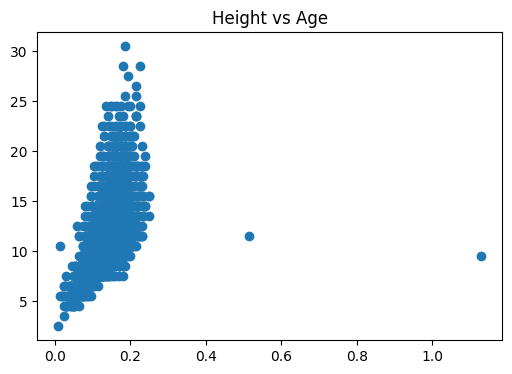

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Height vs Age')
plt.scatter(df.Height, df.Age);

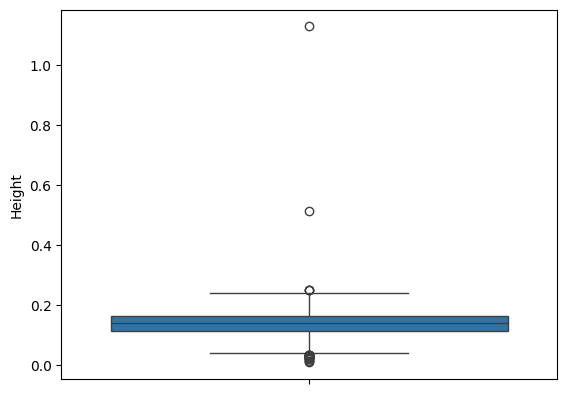

In [ ]:
sns.boxplot(df.Height);

In [ ]:
# Pearson product-moment correlation coefficient
np.corrcoef(df.Height, df.Age)[0][1]

0.5574967219395303

**Comments:**

The correlation coefficient of the Pearson product moments for height (with meat in shell) and abalone age is **0.56**, such a relationship on the Chaddock scale is assessed as moderate.

Also, the distribution of data in the scatter plot is quite dense, but there are some outliers that could negatively affect the correlation coefficient.

#### Detecting Outliers

##### Z-Score

The **z-score** is a statistical measure that indicates how many standard deviations a data point is away from the mean. The z-score can be calculated using the following formula:

**z = (x - mean) / std**,

where **x** is the data point, **mean** is the mean of the dataset, and **std** is the standard deviation of the dataset.

**Reference:** https://saturncloud.io/blog/how-to-detect-and-exclude-outliers-in-a-pandas-dataframe/

In [ ]:
df_copy = df.copy()

# Calculate the z-score for each student's height
z = np.abs(stats.zscore(df_copy.Height))

# Identify outliers as students with a z-score greater than 3
threshold = 3
outliers = df_copy[z > threshold]

# Print the outliers
print(outliers)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
236    I   0.075     0.055   0.010         0.002          0.0010   
1417   M   0.705     0.565   0.515         2.210          1.1075   
2051   F   0.455     0.355   1.130         0.594          0.3320   

      Viscera weight  Shell weight   Age  
236           0.0005        0.0015   2.5  
1417          0.4865        0.5120  11.5  
2051          0.1160        0.1335   9.5  


**Comments:**

Using **z-score**, three outliers were identified; let’s consider how their replacement or removal can affect the data distribution and the correlation coefficient.

###### Replacing Outliers

In [ ]:
df_copy.loc[z > threshold, 'Height'] = df_copy['Height'].median()

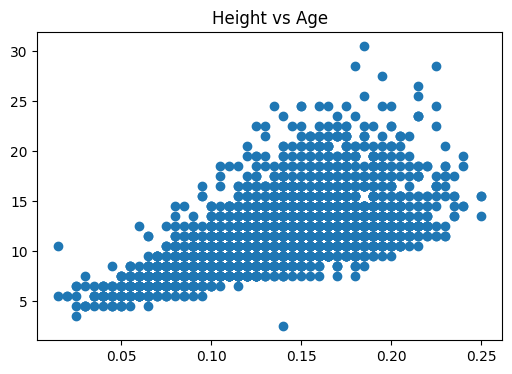

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Height vs Age')
plt.scatter(df_copy.Height, df_copy.Age);

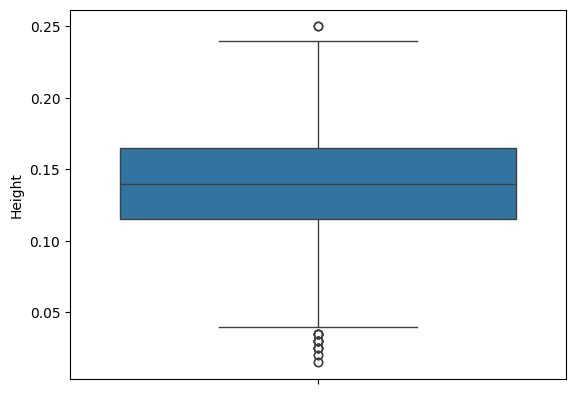

In [ ]:
sns.boxplot(df_copy.Height);

In [ ]:
np.corrcoef(df_copy.Height, df_copy.Age)[0][1]

0.6085132155514125

**Comments:**

Replacing outliers identified using **z-score** with median values leads to an increase in the correlation coefficient to **0.61**, i.e. by 0.05 points compared to the raw data.

Also note that there are still outliers in the diagram.

###### Excluding Outliers

In [ ]:
df_copy = df.copy()

# Calculate the z-score for each student's height
z = np.abs(stats.zscore(df_copy.Height))

# Identify outliers as students with a z-score greater than 3
threshold = 3
outliers = df_copy[z > threshold]

# Print the outliers
print(outliers)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
236    I   0.075     0.055   0.010         0.002          0.0010   
1417   M   0.705     0.565   0.515         2.210          1.1075   
2051   F   0.455     0.355   1.130         0.594          0.3320   

      Viscera weight  Shell weight   Age  
236           0.0005        0.0015   2.5  
1417          0.4865        0.5120  11.5  
2051          0.1160        0.1335   9.5  


In [ ]:
df_copy.drop(outliers.index, inplace=True)
df_copy.shape

(4174, 9)

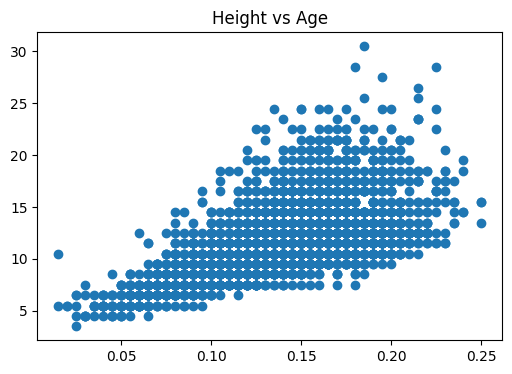

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Height vs Age')
plt.scatter(df_copy.Height, df_copy.Age);

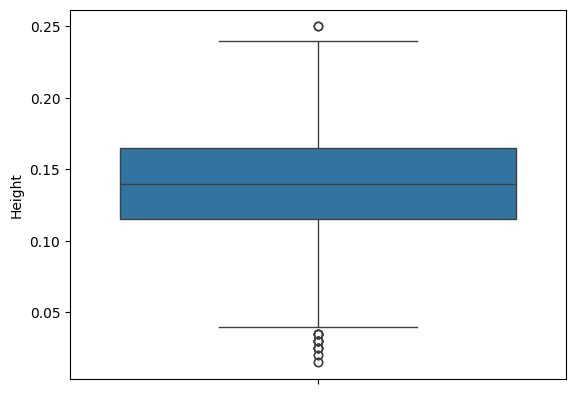

In [ ]:
sns.boxplot(df_copy.Height);

In [ ]:
np.corrcoef(df_copy.Height, df_copy.Age)[0][1]

0.6091148902491028

**Comments:**

Removing outliers identified by **z-score** results in an increase in the correlation coefficient compared to the raw data, but no change compared to replacing outliers with median values, i.e. the effect is almost the same.

Also note that there are still outliers in the diagram.

##### Interquartile Range (IQR)

The **interquartile range (IQR)** is a measure of the spread of the middle 50% of the data. The IQR can be calculated as the difference between the 75th percentile and the 25th percentile of the dataset. Any data point outside the range of 1.5 times the IQR below the 25th percentile or above the 75th percentile can be considered an outlier.

**Reference:** https://saturncloud.io/blog/how-to-detect-and-exclude-outliers-in-a-pandas-dataframe/

In [ ]:
df_copy = df.copy()

# calculate IQR for column Height
Q1 = df_copy['Height'].quantile(0.25)
Q3 = df_copy['Height'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df_copy[(df_copy['Height'] < Q1 - threshold * IQR) | (df_copy['Height'] > Q3 + threshold * IQR)]

# Print the outliers
print(outliers)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
236    I   0.075     0.055   0.010        0.0020          0.0010   
237    F   0.130     0.100   0.030        0.0130          0.0045   
238    I   0.110     0.090   0.030        0.0080          0.0025   
239    I   0.160     0.120   0.035        0.0210          0.0075   
306    I   0.165     0.425   0.030        0.0215          0.0070   
694    F   0.165     0.110   0.020        0.0190          0.0065   
718    I   0.180     0.125   0.035        0.0265          0.0095   
719    I   0.150     0.100   0.025        0.0150          0.0045   
720    I   0.160     0.110   0.025        0.0180          0.0065   
1174   F   0.635     0.495   0.015        1.1565          0.5115   
1417   M   0.705     0.565   0.515        2.2100          1.1075   
1428   F   0.815     0.650   0.250        2.2550          0.8905   
1429   I   0.140     0.105   0.035        0.0140          0.0055   
1763   M   0.775     0.630   0.250        2.7795

**Comments:**

With **IQR** were identified more outliers than with **z-score**.

###### Replacing Outliers

In [ ]:
df_copy.loc[(df_copy['Height'] < Q1 - threshold * IQR) | (df_copy['Height'] > Q3 + threshold * IQR), 'Height'] = df_copy['Height'].median()

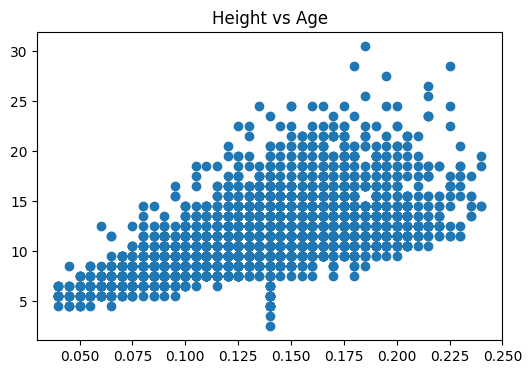

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Height vs Age')
plt.scatter(df_copy.Height, df_copy.Age);

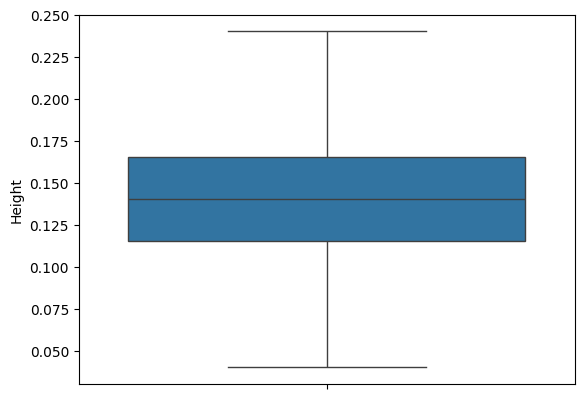

In [ ]:
sns.boxplot(df_copy.Height);

In [ ]:
np.corrcoef(df_copy.Height, df_copy.Age)[0][1]

0.5947271050335475

**Comments:**

Replacing outliers identified using **IQR** with median values leads to an increase in the correlation coefficient to **0.59**, i.e. by 0.03 points compared to the raw data.

Also note that there are no outliers in the diagram.

###### Excluding Outliers

In [ ]:
df_copy = df.copy()

# calculate IQR for column Height
Q1 = df_copy['Height'].quantile(0.25)
Q3 = df_copy['Height'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df_copy[(df_copy['Height'] < Q1 - threshold * IQR) | (df_copy['Height'] > Q3 + threshold * IQR)]

# Print the outliers
print(outliers)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
236    I   0.075     0.055   0.010        0.0020          0.0010   
237    F   0.130     0.100   0.030        0.0130          0.0045   
238    I   0.110     0.090   0.030        0.0080          0.0025   
239    I   0.160     0.120   0.035        0.0210          0.0075   
306    I   0.165     0.425   0.030        0.0215          0.0070   
694    F   0.165     0.110   0.020        0.0190          0.0065   
718    I   0.180     0.125   0.035        0.0265          0.0095   
719    I   0.150     0.100   0.025        0.0150          0.0045   
720    I   0.160     0.110   0.025        0.0180          0.0065   
1174   F   0.635     0.495   0.015        1.1565          0.5115   
1417   M   0.705     0.565   0.515        2.2100          1.1075   
1428   F   0.815     0.650   0.250        2.2550          0.8905   
1429   I   0.140     0.105   0.035        0.0140          0.0055   
1763   M   0.775     0.630   0.250        2.7795

In [ ]:
df_copy.drop(outliers.index, inplace=True)
df_copy.shape

(4150, 9)

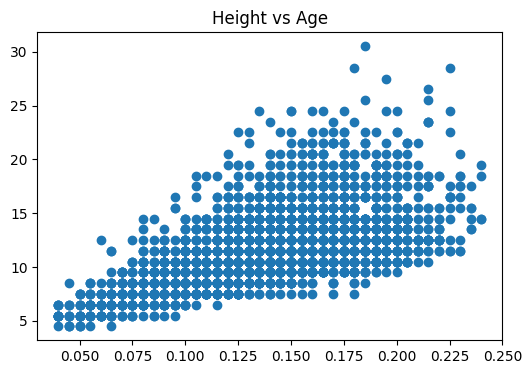

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Height vs Age')
plt.scatter(df_copy.Height, df_copy.Age);

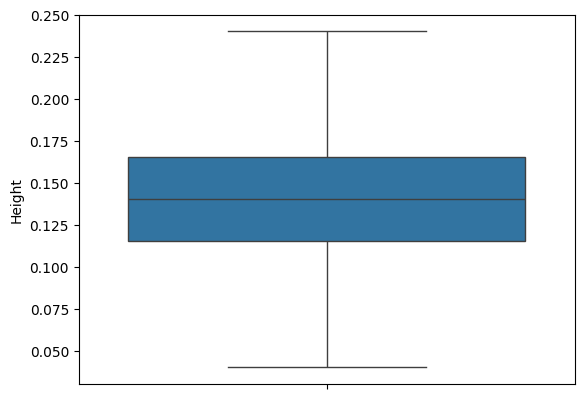

In [ ]:
sns.boxplot(df_copy.Height);

In [ ]:
np.corrcoef(df_copy.Height, df_copy.Age)[0][1]

0.6008429514953719

**Comments:**

Removing outliers identified by **IQR** results in an increase in the correlation coefficient compared to the raw data, but no increase compared to replacing outliers with median values, i.e. the effect is almost the same.

### Whole weight

<Axes: xlabel='Whole weight', ylabel='Count'>

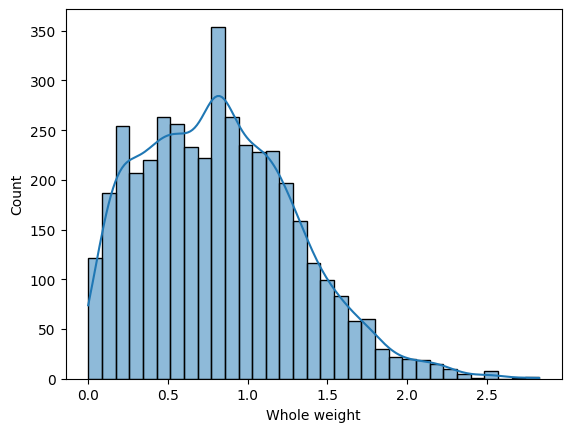

In [ ]:
# sns.set(style='white', rc={"figure.figsize": (8, 4)})
sns.histplot(data=df['Whole weight'], kde=True)

**Positively Skewed Distribution**

Mean $>$ Median $>$ Mode

**Reference:** https://corporatefinanceinstitute.com/resources/data-science/positively-skewed-distribution/

In [ ]:
df['Whole weight'].describe()

count    4177.000000
mean        0.826623
std         0.484521
min         0.002000
25%         0.447500
50%         0.798500
75%         1.141500
max         2.825500
Name: Whole weight, dtype: float64

In [ ]:
df['Whole weight'].mode()

0    0.7985
Name: Whole weight, dtype: float64

In [ ]:
# Anderson Darling test statistic and pvalue
normal_ad(df['Whole weight'].values)

(19.168965762544758, 0.0)

**Comments:**

The data in the **Whole weight** column has a distribution that is close to positively skewed (Mean $>$ Median $>$ Mode), because, in this case, the mode and median are equal: 0.8266 $>$ 0.7985 $\geq$ 0.7985, respectively.

The fact that the distribution differs from normal is also confirmed by the Anderson-Darling test (pvalue = 0.0).

**Whole weight vs Age Relationship**

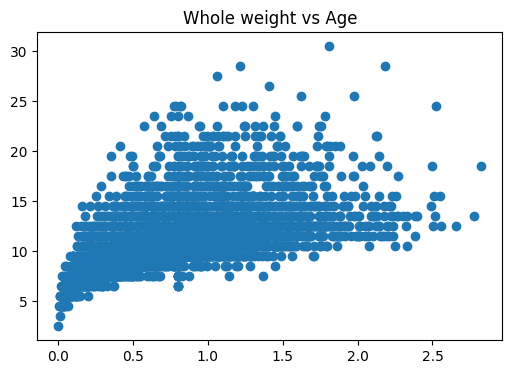

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Whole weight vs Age')
plt.scatter(df['Whole weight'], df.Age);

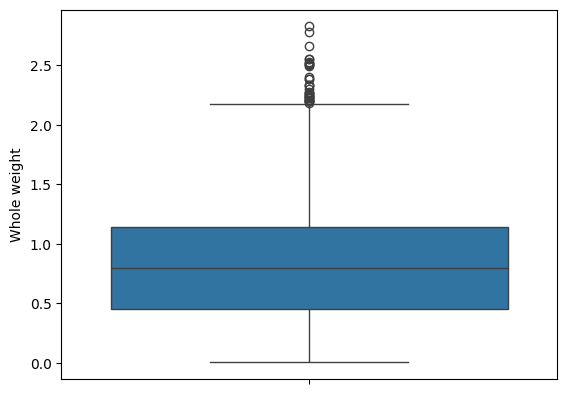

In [ ]:
sns.boxplot(df['Whole weight']);

In [ ]:
# Pearson product-moment correlation coefficient
np.corrcoef(df['Whole weight'], df.Age)[0][1]

0.5321491188953758

**Comments:**

The correlation coefficient of the Pearson product moments for weight and abalone age is **0.53**, such a relationship on the Chaddock scale is assessed as moderate, which is confirmed by the distribution of data on the scatter plot, i.e. the weight of an abalone relative to its age can vary.

In the box plot, we can observe outliers above the "whiskers".

### Shucked weight

<Axes: xlabel='Shucked weight', ylabel='Count'>

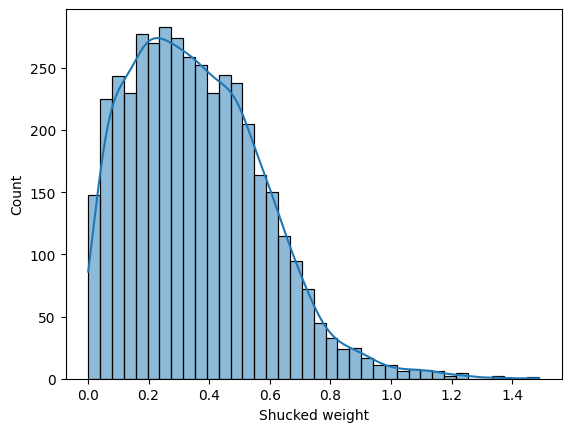

In [ ]:
# sns.set(style='white', rc={"figure.figsize": (8, 4)})
sns.histplot(data=df['Shucked weight'], kde=True)

**Positively Skewed Distribution**

Mean $>$ Median $>$ Mode



In [ ]:
df['Shucked weight'].describe()

count    4177.000000
mean        0.359367
std         0.221963
min         0.001000
25%         0.186000
50%         0.336000
75%         0.502000
max         1.488000
Name: Shucked weight, dtype: float64

In [ ]:
df['Shucked weight'].mode()

0    0.175
Name: Shucked weight, dtype: float64

In [ ]:
# Anderson Darling test statistic and pvalue
normal_ad(df['Shucked weight'].values)

(27.229221575566953, 0.0)

**Comments:**

The data in the **Shucked weight** column has a positively skewed distribution (Mean $>$ Median $>$ Mode): 0.359 $>$ 0.336 $>$ 0.175, respectively.

The fact that the distribution differs from normal is also confirmed by the Anderson-Darling test (pvalue = 0.0).

**Shucked weight vs Age Relationship**

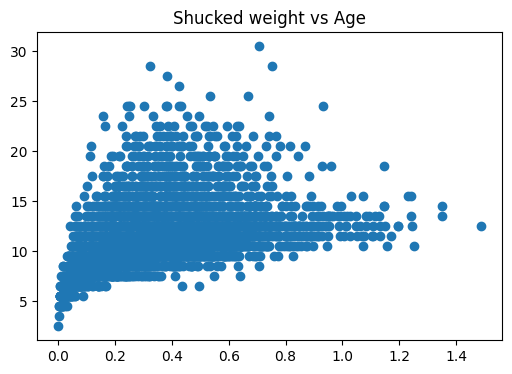

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Shucked weight vs Age')
plt.scatter(df['Shucked weight'], df.Age);

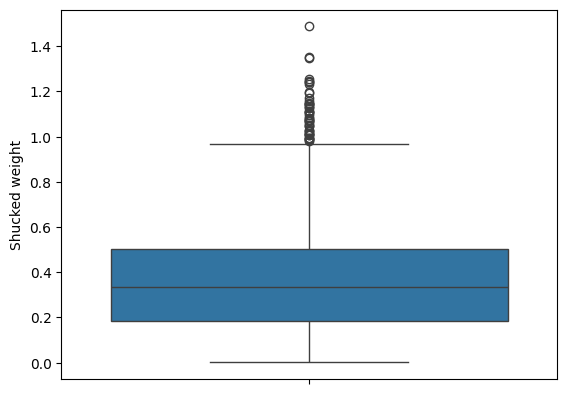

In [ ]:
sns.boxplot(df['Shucked weight']);

In [ ]:
# Pearson product-moment correlation coefficient
np.corrcoef(df['Shucked weight'], df.Age)[0][1]

0.42088365794521443

**Comments:**

The correlation coefficient of the Pearson product moments for shucked weight and abalone age is **0.42**, such a relationship on the Chaddock scale is assessed as weak, which is confirmed by the distribution of data on the scatter plot, i.e. the shucked weight of an abalone relative to its age can vary.

In the box plot, we can observe outliers above the "whiskers".

### Viscera weight

<Axes: xlabel='Viscera weight', ylabel='Count'>

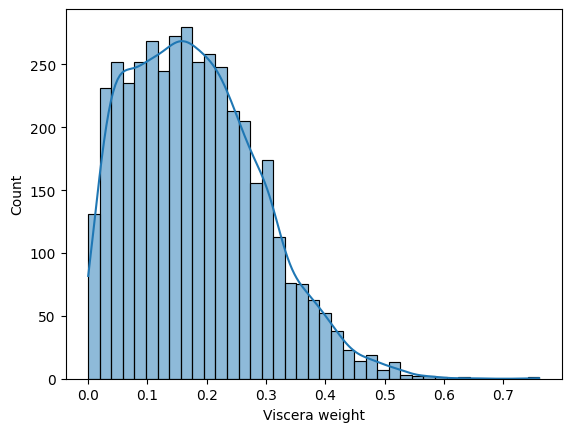

In [ ]:
# sns.set(style='white', rc={"figure.figsize": (8, 4)})
sns.histplot(data=df['Viscera weight'], kde=True)

**Positively Skewed Distribution**

Mean $>$ Median $>$ Mode

In [ ]:
df['Viscera weight'].describe()

count    4177.000000
mean        0.180594
std         0.109614
min         0.000500
25%         0.093500
50%         0.171000
75%         0.253000
max         0.760000
Name: Viscera weight, dtype: float64

In [ ]:
df['Viscera weight'].mode()

0    0.1715
Name: Viscera weight, dtype: float64

In [ ]:
# Anderson Darling test statistic and pvalue
normal_ad(df['Viscera weight'].values)

(25.711089536228428, 0.0)

**Comments:**

The data in the **Viscera weight** column has a distribution that is close to positively skewed (Mean $>$ Median $>$ Mode), because, in this case, the median is slightly less than the mode: 0.1806, 0.1710 и 0.1715, respectively.

The fact that the distribution differs from normal is also confirmed by the Anderson-Darling test (pvalue = 0.0).

**Viscera weight vs Age Relationship**

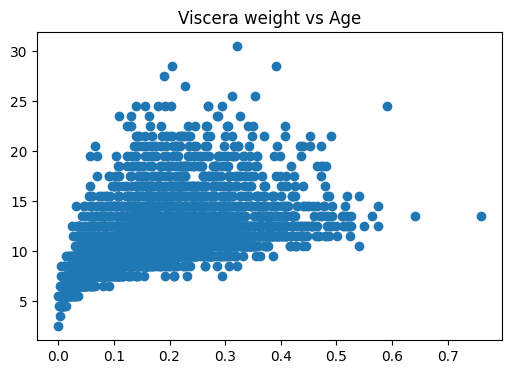

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Viscera weight vs Age')
plt.scatter(df['Viscera weight'], df.Age);

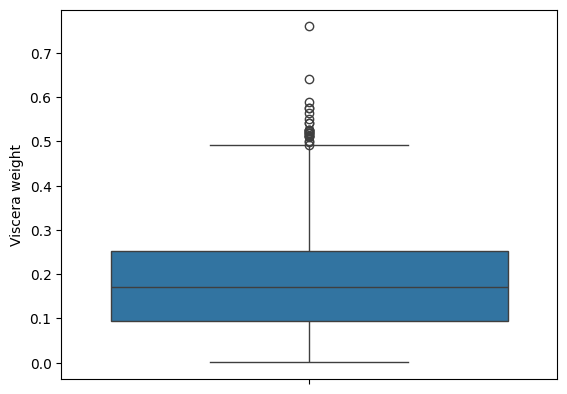

In [ ]:
sns.boxplot(df['Viscera weight']);

In [ ]:
# Pearson product-moment correlation coefficient
np.corrcoef(df['Viscera weight'], df.Age)[0][1]

0.5038192487597714

**Comments:**

The correlation coefficient of the Pearson product moments for viscera weight and abalone age is **0.50**, such a relationship on the Chaddock scale is assessed as weak, which is confirmed by the distribution of data on the scatter plot, i.e. the viscera weight of an abalone relative to its age can vary.

In the box plot, we can observe outliers above the "whiskers".

### Shell weight

<Axes: xlabel='Shell weight', ylabel='Count'>

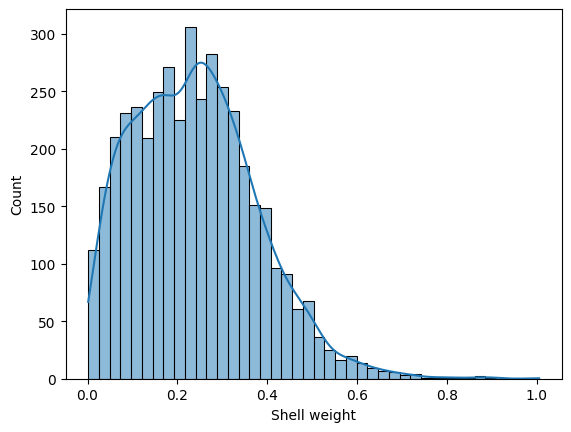

In [ ]:
# sns.set(style='white', rc={"figure.figsize": (8, 4)})
sns.histplot(data=df['Shell weight'], kde=True)

**Positively Skewed Distribution**

Mean $>$ Median $>$ Mode

In [ ]:
df['Shell weight'].describe()

count    4177.000000
mean        0.239023
std         0.138108
min         0.001500
25%         0.131500
50%         0.235000
75%         0.325000
max         1.005000
Name: Shell weight, dtype: float64

In [ ]:
df['Shell weight'].mode()

0    0.235
Name: Shell weight, dtype: float64

In [ ]:
# Anderson Darling test statistic and pvalue
normal_ad(df['Shell weight'].values)

(17.41593144302351, 0.0)

**Comments:**

The data in the **Shell weightt** column has a distribution that is close to positively skewed (Mean $>$ Median $>$ Mode), because, in this case, the mode and median are equal: 0.239 $>$ 0.235 $\geq$ 0.235, respectively.

The fact that the distribution differs from normal is also confirmed by the Anderson-Darling test (pvalue = 0.0).

**Shell weight vs Age Relationship**

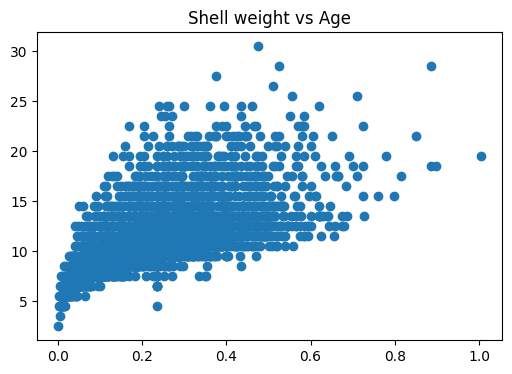

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Shell weight vs Age')
plt.scatter(df['Shell weight'], df.Age);

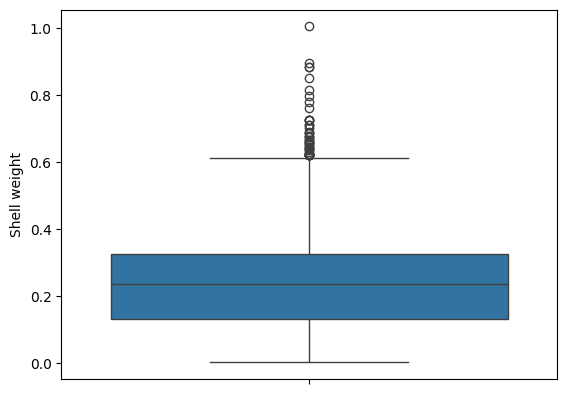

In [ ]:
sns.boxplot(df['Shell weight']);

In [ ]:
# Pearson product-moment correlation coefficient
np.corrcoef(df['Shell weight'], df.Age)[0][1]

0.6221938268476636

**Comments:**

The correlation coefficient of the Pearson product moments for shell weight and abalone age is **0.62**, such a relationship on the Chaddock scale is assessed as moderate, which is confirmed by the distribution of data on the scatter plot, i.e. the shell weight of an abalone relative to its age can vary.

In the box plot, we can observe outliers above the "whiskers".

### Sex

In [ ]:
df['Sex'].value_counts(normalize=True)*100

F    34.809672
M    34.642088
I    30.548240
Name: Sex, dtype: float64

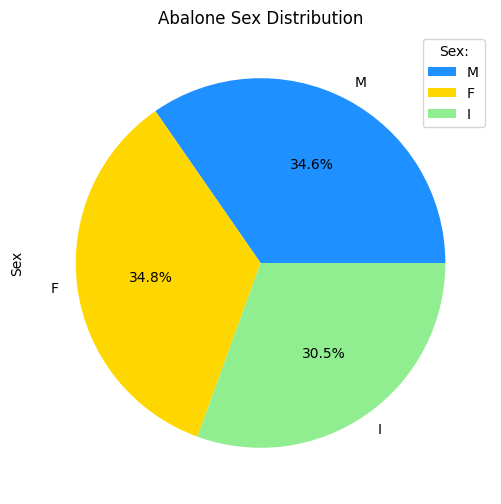

In [ ]:
# Sex Distribution
plt.figure(1, figsize=(6,6))
labels = ("M", "F", "I")
df['Sex'].value_counts(normalize=True).reindex(labels).plot.pie(autopct="%1.1f%%",colors=("dodgerblue", "gold", "lightgreen"),labels=df['Sex'].unique())
plt.title("Abalone Sex Distribution")
plt.legend(title="Sex:")
plt.show()

**Comments:**

In general, there is no significant imbalance by sex and/or developmental stage (assuming that M/F are adult male and female individuals, and Infants are young individuals); slightly less data for Infants - 30.5%, vs. 34.6% and 34.8% for males and females, respectively.

<ipython-input-83-ac91e1dde59d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Age', data = df, palette=cols)


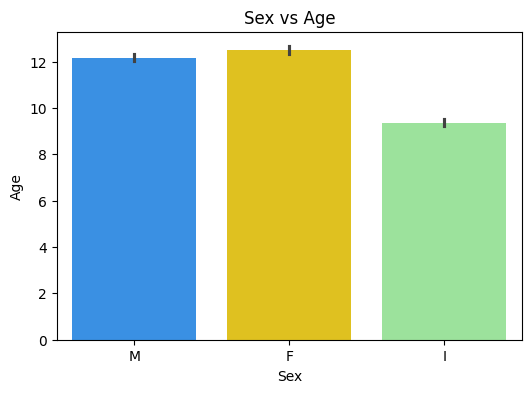

In [ ]:
# Sex vs Age
plt.figure(figsize=(6,4))
cols = ("dodgerblue", "gold", "lightgreen")
sns.barplot(x='Sex', y='Age', data = df, palette=cols)
plt.title('Sex vs Age')
plt.show();

In [ ]:
df.groupby('Sex')['Age'].mean()

Sex
F    12.501376
I     9.372257
M    12.178645
Name: Age, dtype: float64

**Comments:**

The average age of males and females is 12.2 and 12.5 years, respectively, while the average age of Infants is 9.4 years.

In order to assess the relationship between sex and/or stage of development and age of abalone, we recode the categorical feature **Sex** into a numeric one, where $0 -$ is a male individual (**M**), $1 -$ is a female individual ( **F**), $2 -$ Infant (**I**).

In [ ]:
df['Sex'].value_counts()

F    1454
M    1447
I    1276
Name: Sex, dtype: int64

In [ ]:
# Convert the categorical feature Sex where 0-M, 1-F, 2-I
df_copy = df.copy()
df_copy['Sex'] = df_copy['Sex'].apply(lambda r: 0 if r=='M' else (1 if r =='F' else 2))
df_copy['Sex'].value_counts()

1    1454
0    1447
2    1276
Name: Sex, dtype: int64

In [ ]:
np.corrcoef(df_copy['Sex'], df_copy.Age)[0][1]

-0.34152039871934375

The Pearson product moment correlation coefficient for sex and/or developmental stage of abalone (Infant) and its age is **-0.34**, such a relationship is assessed as weak on the Chaddock scale.

### Age

<Axes: xlabel='Age', ylabel='Count'>

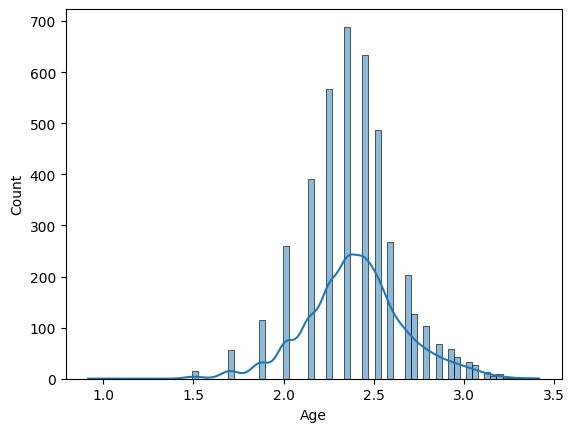

In [ ]:
# sns.set(style='white', rc={"figure.figsize": (8, 4)})
sns.histplot(data=np.log(df['Age']), kde=True)

**Positively Skewed Distribution**

Mean $>$ Median $>$ Mode

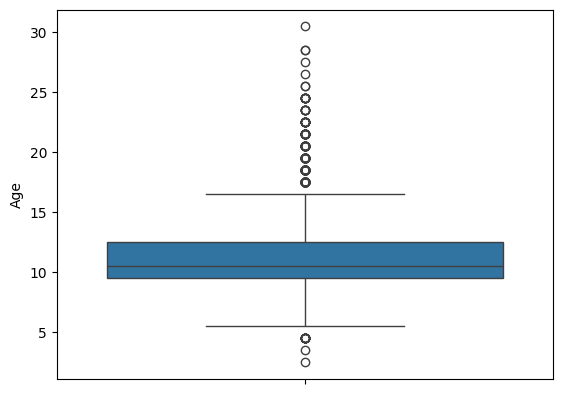

In [ ]:
sns.boxplot(df['Age']);

In [ ]:
df.Age.describe()

count    4177.000000
mean       11.433684
std         3.224169
min         2.500000
25%         9.500000
50%        10.500000
75%        12.500000
max        30.500000
Name: Age, dtype: float64

In [ ]:
df.Age.mode()

0    10.5
Name: Age, dtype: float64

In [ ]:
# Anderson Darling test
anderson(df['Age'].values)

AndersonResult(statistic=78.60014578787741, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=11.433684462532918, scale=3.2241690320681284)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [ ]:
# Anderson Darling test statistic and pvalue
normal_ad(df['Age'].values)

(78.60014578787013, 0.0)

**Comments:**

I. **Data distribution**

1) Graphic method:

The data in the **Age** column has a distribution close to positively skewed (Mean $>$ Median $>$ Mode), because, in this case, the values of the median and mode are equal: 11.4 $>$ 10.5 $\geq$ 10.5, respectively.

In the box plot, we can observe outliers below and above the "whiskers".

2) Numerical method:

To more accurately assess whether the data in the **Age** column corresponds to the normal distribution, we will use the Anderson-Darling test, which is more sensitive to deviations at the tails of distributions.

Test statistic 78.6. We can compare this value to each critical value corresponding to each significance level to see if the test results are significant. For example:

The critical value for $α = 0.01$ is 1.091, because The test statistic (78.6) exceeds this critical value, then the results are significant at a significance level of 0.01.

The critical value for $α = 0.025$ is 0.917, because the test statistic (78.6) exceeds this critical value, then the results are significant at a significance level of 0.025, etc.

Note that the test results are significant at every significance level and the pvalue is 0, hence we reject the null hypothesis of the test no matter what significance level we choose. Thus, we have enough evidence to say that the sample data is not normally distributed.

**Reference:** https://www.codecamp.ru/blog/anderson-darling-test-python/

II. **What problems might arise when training models if the target variable distribution differs from normal?**

Data distribution can have different effects on model training depending on the data itself (type, quality, etc.), the assigned task and selected algorithms.

If we use a simple model, such as linear regression, that returns the average target value regardless of the input, and our target is biased, then that model may under- or over-predict the values. Because of this, the error range of a given model will be larger than with normalized or standardized data, which will degrade metrics such as mean absolute or relative error (MAE/MSE) and negatively impact our conclusions. By normalizing the targets, we reduce the range of this error, which should ultimately directly improve our model.

**Какие проблемы в связи с тем, что распределение целевой переменной отличается от нормального, могут возникнуть при обучении моделей?**

**Reference:** https://datascience.stackexchange.com/questions/74794/how-distribution-of-data-effects-model-performance

## Data interdependence

### Correlation

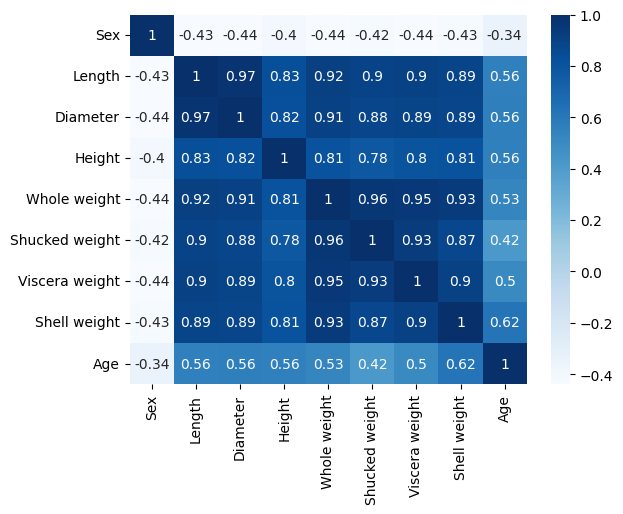

In [ ]:
# Use df.copy where Sex variable is converted to a Numerical one
corr = df_copy.corr() # Pearson
sns.heatmap(corr, cmap="Blues", annot=True);

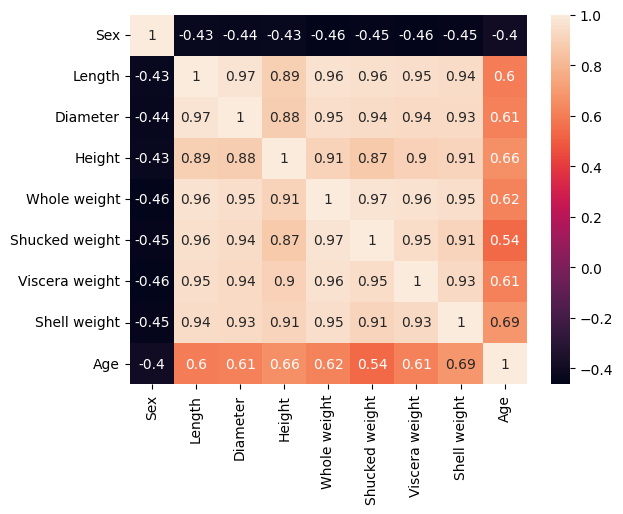

In [ ]:
corr = df_copy.corr(method='spearman')
sns.heatmap(corr, annot=True);

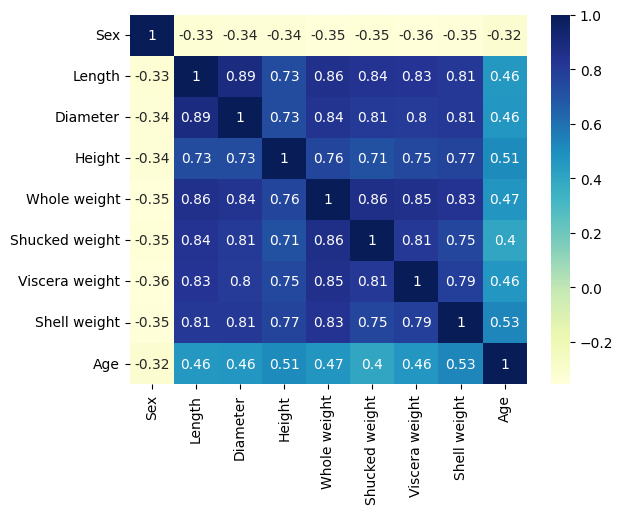

In [ ]:
corr = df_copy.corr(method='kendall')
sns.heatmap(corr, cmap="YlGnBu", annot=True);

**Comments:**

From the correlation analysis it is clear that there is a connection between all the characteristics, which varies from weak (between sex and age) to very strong - between the length and diameter of abalone.

### ANOVA

In [ ]:
# Running the one-way anova test between Sex and Age
# Assumption(H0) is that Age and Sex are NOT correlated

# Finds out the Age data for each Sex as a list

CategoryGroupLists = df.groupby('Sex')['Age'].apply(list)

# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value >= 0.05

AnovaResults = f_oneway(*CategoryGroupLists)

print('P-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')

P-Value for Anova is:  2.35303895865748e-182
Features are correlated


**Reference:** https://colab.research.google.com/drive/1-pxg_NUIGxn5OrqF2UZ_1nRlI6FWbF-I?usp=sharing

In [ ]:
Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'object' and df[c2].dtype != 'object':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

Category       Numerical Is correlated
0      Sex          Length           Yes
1      Sex        Diameter           Yes
2      Sex          Height           Yes
3      Sex    Whole weight           Yes
4      Sex  Shucked weight           Yes
5      Sex  Viscera weight           Yes
6      Sex    Shell weight           Yes
7      Sex             Age           Yes

**Comments:**

The ANOVA test shows that there is a significant relationship between category and each of the numerical features.

## Pandas vs Polars

In [ ]:
# Create a new dataset by copying and merging the original dataset multiple times
df_big = df.copy()

for i in range(239):
  df_big = pd.concat([df_big, df])

df_big.to_csv("abalone_big.csv", index=False)

In [ ]:
df_big.shape, df.shape

((1002480, 9), (4177, 9))

### Loading Data

In [ ]:
%%time

df_pl = pl.read_csv("abalone_big.csv")

CPU times: user 472 ms, sys: 59.3 ms, total: 531 ms
Wall time: 741 ms


In [ ]:
%%time

df = pd.read_csv("abalone_big.csv")

CPU times: user 651 ms, sys: 41.1 ms, total: 692 ms
Wall time: 1.01 s


**Comments:**

In this experiment, Polars loads data a little faster, but if we repeat this experiment several times, will see that when loading this data (about 1M rows) there is no significant difference between Polars and Pandas, perhaps it will be noticeable when working with more data.

### Selecting and Filtering Data

In [ ]:
df.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.7985          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight   Age  
0         0.150  16.5  
1         0.070   8.5  
2         0.210  10.5  
3         0.155  11.5  
4         0.055   8.5

#### Selecting Data

In [ ]:
%%time

df[['Sex', 'Age']]  # Pandas

CPU times: user 12.7 ms, sys: 0 ns, total: 12.7 ms
Wall time: 12.6 ms


Sex   Age
0         M  16.5
1         M   8.5
2         F  10.5
3         M  11.5
4         I   8.5
...      ..   ...
1002475   F  12.5
1002476   M  11.5
1002477   M  10.5
1002478   F  11.5
1002479   M  13.5

[1002480 rows x 2 columns]

In [ ]:
%%time

df_pl[['Sex', 'Age']]  # Polars

# df_pl.select(pl.col(['carat', 'depth']))

CPU times: user 1.08 ms, sys: 21 µs, total: 1.1 ms
Wall time: 9.88 ms


shape: (1_002_480, 2)
┌─────┬──────┐
│ Sex ┆ Age  │
│ --- ┆ ---  │
│ str ┆ f64  │
╞═════╪══════╡
│ M   ┆ 16.5 │
│ M   ┆ 8.5  │
│ F   ┆ 10.5 │
│ M   ┆ 11.5 │
│ …   ┆ …    │
│ M   ┆ 11.5 │
│ M   ┆ 10.5 │
│ F   ┆ 11.5 │
│ M   ┆ 13.5 │
└─────┴──────┘

**Comments:**

In this experiment, Polars makes data sampling a little faster, but if we repeat this experiment several times, we can see that there is no significant difference between Polars and Pandas.

#### Filtering Data

##### Filtering by one condition

**Age > 10**

In [ ]:
# Pandas
%%time

df.query('Age > 10')

CPU times: user 19.4 ms, sys: 5.1 ms, total: 24.5 ms
Wall time: 24.4 ms


Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0         M   0.455     0.365   0.095        0.5140          0.2245   
2         F   0.530     0.420   0.135        0.6770          0.2565   
3         M   0.440     0.365   0.125        0.7985          0.2155   
6         F   0.530     0.415   0.150        0.7775          0.2370   
7         F   0.545     0.425   0.125        0.7680          0.2940   
...      ..     ...       ...     ...           ...             ...   
1002475   F   0.565     0.450   0.165        0.8870          0.3700   
1002476   M   0.590     0.440   0.135        0.9660          0.4390   
1002477   M   0.600     0.475   0.205        1.1760          0.5255   
1002478   F   0.625     0.485   0.150        1.0945          0.5310   
1002479   M   0.710     0.555   0.195        1.9485          0.9455   

         Viscera weight  Shell weight   Age  
0                0.1010        0.1500  16.5  
2                0.1415        0.2100  10.5  
3                0.1140        0.1550  11.5  
6                0.1415        0.3300  21.5  
7                0.1495        0.2600  17.5  
...                 ...           ...   ...  
1002475          0.2390        0.2490  12.5  
1002476          0.2145        0.2605  11.5  
1002477          0.2875        0.3080  10.5  
1002478          0.2610        0.2960  11.5  
1002479          0.3765        0.4950  13.5  

[664800 rows x 9 columns]

In [ ]:
# Polars
%%time

df_pl.filter(pl.col('Age') > 10)

CPU times: user 29.5 ms, sys: 11.3 ms, total: 40.8 ms
Wall time: 25.2 ms


shape: (664_800, 9)
┌─────┬────────┬──────────┬────────┬───┬────────────────┬────────────────┬──────────────┬──────┐
│ Sex ┆ Length ┆ Diameter ┆ Height ┆ … ┆ Shucked weight ┆ Viscera weight ┆ Shell weight ┆ Age  │
│ --- ┆ ---    ┆ ---      ┆ ---    ┆   ┆ ---            ┆ ---            ┆ ---          ┆ ---  │
│ str ┆ f64    ┆ f64      ┆ f64    ┆   ┆ f64            ┆ f64            ┆ f64          ┆ f64  │
╞═════╪════════╪══════════╪════════╪═══╪════════════════╪════════════════╪══════════════╪══════╡
│ M   ┆ 0.455  ┆ 0.365    ┆ 0.095  ┆ … ┆ 0.2245         ┆ 0.101          ┆ 0.15         ┆ 16.5 │
│ F   ┆ 0.53   ┆ 0.42     ┆ 0.135  ┆ … ┆ 0.2565         ┆ 0.1415         ┆ 0.21         ┆ 10.5 │
│ M   ┆ 0.44   ┆ 0.365    ┆ 0.125  ┆ … ┆ 0.2155         ┆ 0.114          ┆ 0.155        ┆ 11.5 │
│ F   ┆ 0.53   ┆ 0.415    ┆ 0.15   ┆ … ┆ 0.237          ┆ 0.1415         ┆ 0.33         ┆ 21.5 │
│ …   ┆ …      ┆ …        ┆ …      ┆ … ┆ …              ┆ …              ┆ …            ┆ …    │
│ M   ┆ 0.59   ┆ 0.44     ┆ 0.135  ┆ … ┆ 0.439          ┆ 0.2145         ┆ 0.2605       ┆ 11.5 │
│ M   ┆ 0.6    ┆ 0.475    ┆ 0.205  ┆ … ┆ 0.5255         ┆ 0.2875         ┆ 0.308        ┆ 10.5 │
│ F   ┆ 0.625  ┆ 0.485    ┆ 0.15   ┆ … ┆ 0.531          ┆ 0.261          ┆ 0.296        ┆ 11.5 │
│ M   ┆ 0.71   ┆ 0.555    ┆ 0.195  ┆ … ┆ 0.9455         ┆ 0.3765         ┆ 0.495        ┆ 13.5 │
└─────┴────────┴──────────┴────────┴───┴────────────────┴────────────────┴──────────────┴──────┘

**Age > 1**

In [ ]:
# Pandas
%%time

df.query('Age > 1')

CPU times: user 35.9 ms, sys: 11.7 ms, total: 47.6 ms
Wall time: 99.8 ms


Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0         M   0.455     0.365   0.095        0.5140          0.2245   
1         M   0.350     0.265   0.090        0.2255          0.0995   
2         F   0.530     0.420   0.135        0.6770          0.2565   
3         M   0.440     0.365   0.125        0.7985          0.2155   
4         I   0.330     0.255   0.080        0.2050          0.0895   
...      ..     ...       ...     ...           ...             ...   
1002475   F   0.565     0.450   0.165        0.8870          0.3700   
1002476   M   0.590     0.440   0.135        0.9660          0.4390   
1002477   M   0.600     0.475   0.205        1.1760          0.5255   
1002478   F   0.625     0.485   0.150        1.0945          0.5310   
1002479   M   0.710     0.555   0.195        1.9485          0.9455   

         Viscera weight  Shell weight   Age  
0                0.1010        0.1500  16.5  
1                0.0485        0.0700   8.5  
2                0.1415        0.2100  10.5  
3                0.1140        0.1550  11.5  
4                0.0395        0.0550   8.5  
...                 ...           ...   ...  
1002475          0.2390        0.2490  12.5  
1002476          0.2145        0.2605  11.5  
1002477          0.2875        0.3080  10.5  
1002478          0.2610        0.2960  11.5  
1002479          0.3765        0.4950  13.5  

[1002480 rows x 9 columns]

In [ ]:
# Polars
%%time

df_pl.filter(pl.col('Age') > 1)

CPU times: user 2.58 ms, sys: 0 ns, total: 2.58 ms
Wall time: 2.53 ms


shape: (1_002_480, 9)
┌─────┬────────┬──────────┬────────┬───┬────────────────┬────────────────┬──────────────┬──────┐
│ Sex ┆ Length ┆ Diameter ┆ Height ┆ … ┆ Shucked weight ┆ Viscera weight ┆ Shell weight ┆ Age  │
│ --- ┆ ---    ┆ ---      ┆ ---    ┆   ┆ ---            ┆ ---            ┆ ---          ┆ ---  │
│ str ┆ f64    ┆ f64      ┆ f64    ┆   ┆ f64            ┆ f64            ┆ f64          ┆ f64  │
╞═════╪════════╪══════════╪════════╪═══╪════════════════╪════════════════╪══════════════╪══════╡
│ M   ┆ 0.455  ┆ 0.365    ┆ 0.095  ┆ … ┆ 0.2245         ┆ 0.101          ┆ 0.15         ┆ 16.5 │
│ M   ┆ 0.35   ┆ 0.265    ┆ 0.09   ┆ … ┆ 0.0995         ┆ 0.0485         ┆ 0.07         ┆ 8.5  │
│ F   ┆ 0.53   ┆ 0.42     ┆ 0.135  ┆ … ┆ 0.2565         ┆ 0.1415         ┆ 0.21         ┆ 10.5 │
│ M   ┆ 0.44   ┆ 0.365    ┆ 0.125  ┆ … ┆ 0.2155         ┆ 0.114          ┆ 0.155        ┆ 11.5 │
│ …   ┆ …      ┆ …        ┆ …      ┆ … ┆ …              ┆ …              ┆ …            ┆ …    │
│ M   ┆ 0.59   ┆ 0.44     ┆ 0.135  ┆ … ┆ 0.439          ┆ 0.2145         ┆ 0.2605       ┆ 11.5 │
│ M   ┆ 0.6    ┆ 0.475    ┆ 0.205  ┆ … ┆ 0.5255         ┆ 0.2875         ┆ 0.308        ┆ 10.5 │
│ F   ┆ 0.625  ┆ 0.485    ┆ 0.15   ┆ … ┆ 0.531          ┆ 0.261          ┆ 0.296        ┆ 11.5 │
│ M   ┆ 0.71   ┆ 0.555    ┆ 0.195  ┆ … ┆ 0.9455         ┆ 0.3765         ┆ 0.495        ┆ 13.5 │
└─────┴────────┴──────────┴────────┴───┴────────────────┴────────────────┴──────────────┴──────┘

**Comments:**

In this experiment, the following can be noted:

* When filtering data by the first condition (Age > 10), we get an output data array consisting of 664K rows (more than half of the total dataset), and here there is not much difference between Polars and Pandas.
* When filtering data by the second condition (Age > 1), we get a data array consisting of **1M rows** (almost the entire dataset), and here **Polars processes** the request **about 40 times faster than Pandas!**




##### Filtering by two conditions

In [ ]:
%%time

df[(df.Sex == 'M') & (df.Age > 0)]

CPU times: user 67.9 ms, sys: 3.27 ms, total: 71.2 ms
Wall time: 69.8 ms


Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0         M   0.455     0.365   0.095        0.5140          0.2245   
1         M   0.350     0.265   0.090        0.2255          0.0995   
3         M   0.440     0.365   0.125        0.7985          0.2155   
8         M   0.475     0.370   0.125        0.5095          0.2165   
11        M   0.430     0.350   0.110        0.4060          0.1675   
...      ..     ...       ...     ...           ...             ...   
1002473   M   0.550     0.430   0.130        0.8395          0.3155   
1002474   M   0.560     0.430   0.155        0.8675          0.4000   
1002476   M   0.590     0.440   0.135        0.9660          0.4390   
1002477   M   0.600     0.475   0.205        1.1760          0.5255   
1002479   M   0.710     0.555   0.195        1.9485          0.9455   

         Viscera weight  Shell weight   Age  
0                0.1010        0.1500  16.5  
1                0.0485        0.0700   8.5  
3                0.1140        0.1550  11.5  
8                0.1125        0.1650  10.5  
11               0.0810        0.1350  11.5  
...                 ...           ...   ...  
1002473          0.1955        0.2405  11.5  
1002474          0.1720        0.2290   9.5  
1002476          0.2145        0.2605  11.5  
1002477          0.2875        0.3080  10.5  
1002479          0.3765        0.4950  13.5  

[347280 rows x 9 columns]

In [ ]:
%%time

df_pl.filter((pl.col('Sex') == 'M') & (pl.col('Age') > 0))

CPU times: user 28 ms, sys: 5.74 ms, total: 33.7 ms
Wall time: 30.6 ms


shape: (347_280, 9)
┌─────┬────────┬──────────┬────────┬───┬────────────────┬────────────────┬──────────────┬──────┐
│ Sex ┆ Length ┆ Diameter ┆ Height ┆ … ┆ Shucked weight ┆ Viscera weight ┆ Shell weight ┆ Age  │
│ --- ┆ ---    ┆ ---      ┆ ---    ┆   ┆ ---            ┆ ---            ┆ ---          ┆ ---  │
│ str ┆ f64    ┆ f64      ┆ f64    ┆   ┆ f64            ┆ f64            ┆ f64          ┆ f64  │
╞═════╪════════╪══════════╪════════╪═══╪════════════════╪════════════════╪══════════════╪══════╡
│ M   ┆ 0.455  ┆ 0.365    ┆ 0.095  ┆ … ┆ 0.2245         ┆ 0.101          ┆ 0.15         ┆ 16.5 │
│ M   ┆ 0.35   ┆ 0.265    ┆ 0.09   ┆ … ┆ 0.0995         ┆ 0.0485         ┆ 0.07         ┆ 8.5  │
│ M   ┆ 0.44   ┆ 0.365    ┆ 0.125  ┆ … ┆ 0.2155         ┆ 0.114          ┆ 0.155        ┆ 11.5 │
│ M   ┆ 0.475  ┆ 0.37     ┆ 0.125  ┆ … ┆ 0.2165         ┆ 0.1125         ┆ 0.165        ┆ 10.5 │
│ …   ┆ …      ┆ …        ┆ …      ┆ … ┆ …              ┆ …              ┆ …            ┆ …    │
│ M   ┆ 0.56   ┆ 0.43     ┆ 0.155  ┆ … ┆ 0.4            ┆ 0.172          ┆ 0.229        ┆ 9.5  │
│ M   ┆ 0.59   ┆ 0.44     ┆ 0.135  ┆ … ┆ 0.439          ┆ 0.2145         ┆ 0.2605       ┆ 11.5 │
│ M   ┆ 0.6    ┆ 0.475    ┆ 0.205  ┆ … ┆ 0.5255         ┆ 0.2875         ┆ 0.308        ┆ 10.5 │
│ M   ┆ 0.71   ┆ 0.555    ┆ 0.195  ┆ … ┆ 0.9455         ┆ 0.3765         ┆ 0.495        ┆ 13.5 │
└─────┴────────┴──────────┴────────┴───┴────────────────┴────────────────┴──────────────┴──────┘

**Comments:**

When filtering data **by two conditions**, we get a data array consisting of **347K rows** (less than half of the dataset), and here **Polars processes** the request **2 times faster than Pandas!**



### Data aggregation

In [ ]:
df_pl.head()

shape: (5, 9)
┌─────┬────────┬──────────┬────────┬───┬────────────────┬────────────────┬──────────────┬──────┐
│ Sex ┆ Length ┆ Diameter ┆ Height ┆ … ┆ Shucked weight ┆ Viscera weight ┆ Shell weight ┆ Age  │
│ --- ┆ ---    ┆ ---      ┆ ---    ┆   ┆ ---            ┆ ---            ┆ ---          ┆ ---  │
│ str ┆ f64    ┆ f64      ┆ f64    ┆   ┆ f64            ┆ f64            ┆ f64          ┆ f64  │
╞═════╪════════╪══════════╪════════╪═══╪════════════════╪════════════════╪══════════════╪══════╡
│ M   ┆ 0.455  ┆ 0.365    ┆ 0.095  ┆ … ┆ 0.2245         ┆ 0.101          ┆ 0.15         ┆ 16.5 │
│ M   ┆ 0.35   ┆ 0.265    ┆ 0.09   ┆ … ┆ 0.0995         ┆ 0.0485         ┆ 0.07         ┆ 8.5  │
│ F   ┆ 0.53   ┆ 0.42     ┆ 0.135  ┆ … ┆ 0.2565         ┆ 0.1415         ┆ 0.21         ┆ 10.5 │
│ M   ┆ 0.44   ┆ 0.365    ┆ 0.125  ┆ … ┆ 0.2155         ┆ 0.114          ┆ 0.155        ┆ 11.5 │
│ I   ┆ 0.33   ┆ 0.255    ┆ 0.08   ┆ … ┆ 0.0895         ┆ 0.0395         ┆ 0.055        ┆ 8.5  │
└─────┴────────┴──────────┴────────┴───┴────────────────┴────────────────┴──────────────┴──────┘

In [ ]:
%%time

df.groupby('Sex').agg({'Age' : 'mean', 'Whole weight' : 'max'})  # Pandas

CPU times: user 49.2 ms, sys: 51 µs, total: 49.3 ms
Wall time: 49.4 ms


Age  Whole weight
Sex                         
F    12.501376        2.8255
I     9.372257        2.0495
M    12.178645        2.7795

In [ ]:
%%time

df_pl.groupby('Sex').agg([pl.mean('Age'), pl.max('Whole weight')])  # Polars

CPU times: user 31.3 ms, sys: 4.61 ms, total: 35.9 ms
Wall time: 32.3 ms


<timed eval>:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.


shape: (3, 3)
┌─────┬───────────┬──────────────┐
│ Sex ┆ Age       ┆ Whole weight │
│ --- ┆ ---       ┆ ---          │
│ str ┆ f64       ┆ f64          │
╞═════╪═══════════╪══════════════╡
│ F   ┆ 12.501376 ┆ 2.8255       │
│ M   ┆ 12.178645 ┆ 2.7795       │
│ I   ┆ 9.372257  ┆ 2.0495       │
└─────┴───────────┴──────────────┘

In [ ]:
# lazy operations
%%time

q = (
    df_pl
    .lazy()
    .groupby(by='Sex')
    .agg(
        [
            pl.col('Age').mean(),
            pl.col('Whole weight').max()
        ]
    )
)

CPU times: user 1.22 ms, sys: 55 µs, total: 1.27 ms
Wall time: 1.23 ms


<timed exec>:2: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.


In [ ]:
%%time

q.collect()

CPU times: user 35.6 ms, sys: 444 µs, total: 36 ms
Wall time: 31.8 ms


shape: (3, 3)
┌─────┬───────────┬──────────────┐
│ Sex ┆ Age       ┆ Whole weight │
│ --- ┆ ---       ┆ ---          │
│ str ┆ f64       ┆ f64          │
╞═════╪═══════════╪══════════════╡
│ M   ┆ 12.178645 ┆ 2.7795       │
│ I   ┆ 9.372257  ┆ 2.0495       │
│ F   ┆ 12.501376 ┆ 2.8255       │
└─────┴───────────┴──────────────┘

**Comments:**

Polars has a slight advantage in data aggregation, but the grouping here is simple.

A significant advantage of Polars in working with “big data” can be lazy operations, by optimizing the order of execution of query operations, for example, with complex data groupings.

## Pandas profiling

In [ ]:
# !pip install ydata_profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

     - 17.8 MB 23.8 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 30.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
df_copy = df.copy()

profile_report = ProfileReport(df_copy, title='Pandas Profiling Report')

In [ ]:
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
pip install --upgrade Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.1.0 which is incompatible.


In [ ]:
profile_report.to_file('abalone_report.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]